<h1>Zadanie 1<h1>

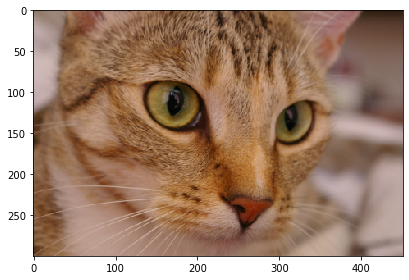

In [1]:
from skimage import data, io

img = data.cat()

io.imshow(img)

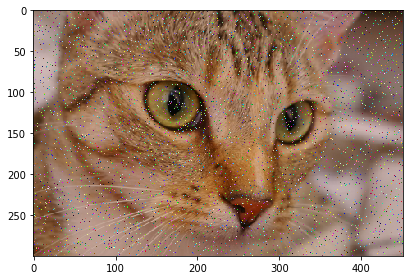

In [2]:
import random

p = 2
N = img.size * p // 100

img_copy = img.copy()

for i in range(0, N):
    x = random.randint(0, img_copy.shape[1] - 1)
    y = random.randint(0, img_copy.shape[0] - 1)

    R = random.randint(0, 256)
    G = random.randint(0, 256)
    B = random.randint(0, 256)
    img_copy[y, x] = (R, G, B)

io.imshow(img_copy)


<h1>Zadanie 2<h1>

In [3]:
import numpy as np

def NMSE(image, image_noisy):
    diff = image.astype(float) - image_noisy.astype(float)
    mse = np.sum(np.square(diff).astype(float)).astype(float)
    nmse = mse / np.sum(np.square(image).astype(float)).astype(float)
    return nmse

print(NMSE(img, img_copy))


4.181323070012601


<h1>Zadanie 3<h1>

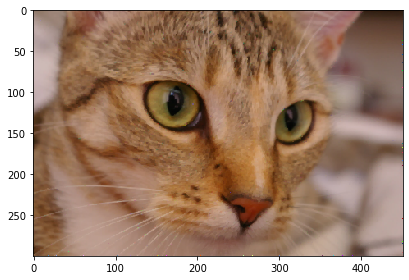

In [4]:
def VMF(img):
    img_copy = img.copy()
    for z in range(img.shape[2]):
        for y in range(img.shape[1] - 1):
            for x in range(img.shape[0] - 1):
                p0 = img_copy[x, y, z].astype(int)
                p1 = img_copy[x - 1, y, z].astype(int)
                p2 = img_copy[x, y + 1, z].astype(int)
                p3 = img_copy[x + 1, y, z].astype(int)
                p4 = img_copy[x, y - 1, z].astype(int)

                suma0 = (abs((p0 - p1)) + abs((p0 - p2)) + abs((p0 - p3)) + abs((p0 - p4)))
                suma1 = (abs((p0 - p1)) + abs((p1 - p2)) + abs((p1 - p3)) + abs((p1 - p4)))
                suma2 = (abs((p0 - p2)) + abs((p1 - p2)) + abs((p2 - p3)) + abs((p2 - p4)))
                suma3 = (abs((p0 - p3)) + abs((p1 - p3)) + abs((p2 - p3)) + abs((p3 - p4)))
                suma4 = (abs((p0 - p4)) + abs((p1 - p4)) + abs((p2 - p4)) + abs((p3 - p4)))
                sumain = suma0

                if sumain > suma1:
                    p0 = p1
                    sumain = suma1
                if sumain > suma2:
                    p0 = p2
                    sumain = suma2
                if sumain > suma3:
                    p0 = p3
                    sumain = suma3
                if sumain > suma4:
                    p0 = p4
                    sumain = suma4
                img_copy[x, y, z] = p0
    return img_copy

io.imshow(VMF(img_copy))


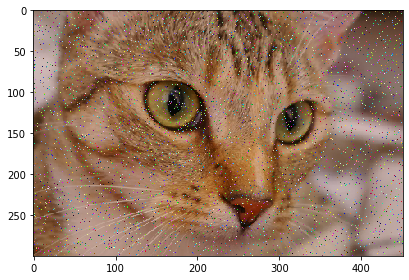

In [5]:
def FMVMF(img):
    beta = 0.75
    img_copy = img.copy()
    for z in range(img.shape[2]):
        for y in range(img.shape[1] - 1):
            for x in range(img.shape[0] - 1):
                p0 = img_copy[x, y, z].astype(int)
                p1 = img_copy[x - 1, y, z].astype(int)
                p2 = img_copy[x, y + 1, z].astype(int)
                p3 = img_copy[x + 1, y, z].astype(int)
                p4 = img_copy[x, y - 1, z].astype(int)

                suma0 = (abs((p0 - p1)) + abs((p0 - p2)) + abs((p0 - p3)) + abs((p0 - p4))) - beta
                suma1 = (abs((p0 - p1)) + abs((p1 - p2)) + abs((p1 - p3)) + abs((p1 - p4)))
                suma2 = (abs((p0 - p2)) + abs((p1 - p2)) + abs((p2 - p3)) + abs((p2 - p4)))
                suma3 = (abs((p0 - p3)) + abs((p1 - p3)) + abs((p2 - p3)) + abs((p3 - p4)))
                suma4 = (abs((p0 - p4)) + abs((p1 - p4)) + abs((p2 - p4)) + abs((p3 - p4)))
                sumamin = suma1
                ptmp = p1

                if(sumamin>suma2):
                    ptmp = p2
                    sumamin = suma2
                if(sumamin>suma3):
                    ptmp = p3
                    sumamin = suma3
                if(sumamin>suma4): 
                    ptmp = p4
                    sumamin = suma4
                if(suma0-beta<sumamin):
                    p0 = ptmp
                img_copy[x, y, z] = p0
    return img_copy

io.imshow(FMVMF(img_copy))

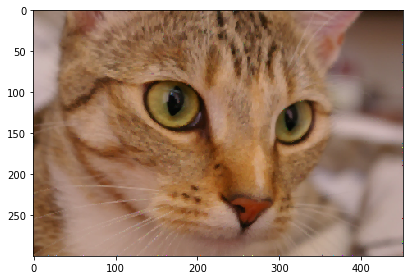

In [6]:
def PNNFMVMF(img, img_noised):
    beta = 0.75
    img_copy = img.copy()
    img_copy_noised = img_noised.copy()
    for z in range(img.shape[2]):
        for y in range(img.shape[1] - 1):
            for x in range(img.shape[0] - 1):
                p0 = img_copy[x, y, z].astype(int)
                p1 = img_copy[x - 1, y, z].astype(int)
                p2 = img_copy[x, y + 1, z].astype(int)
                p3 = img_copy[x + 1, y, z].astype(int)
                p4 = img_copy[x, y - 1, z].astype(int)
                p3N = img_copy_noised[x + 1, y, z].astype(int)
                p4N = img_copy_noised[x, y - 1, z].astype(int)

                suma0 = (abs((p0 - p1)) + abs((p0 - p2)) + abs((p0 - p3N)) + abs((p0 - p4N))) - beta
                suma1 = (abs((p1 - p2)) + abs((p1 - p3N)) + abs((p1 - p4N)))
                suma2 = (abs((p1 - p2)) + abs((p2 - p3N)) + abs((p2 - p4N)))
                suma3 = (abs((p1 - p3N)) + abs((p2 - p3N)) + abs((p3 - p4N)))
                suma4 = (abs((p1 - p4N)) + abs((p2 - p4N)) + abs((p3N - p4)))
                
                howmanygt = 0
                if(suma0>suma1):
                    howmanygt+=1
                if(suma0>suma2):
                    howmanygt+=1
                if(suma0>suma3):
                    howmanygt+=1
                if(suma0>suma4):
                    howmanygt+=1
                if(howmanygt<2):
                    continue
                sumamin = suma1
                p0 = p1

                if(sumamin>suma2):
                    p0 = p2
                    sumamin = suma2
                if(sumamin>suma3):
                    p0 = p3
                    sumamin = suma3
                if(sumamin>suma4): 
                    p0 = p4
                img_copy[x, y, z] = p0
    return img_copy

io.imshow(PNNFMVMF(img_copy, VMF(img_copy)))

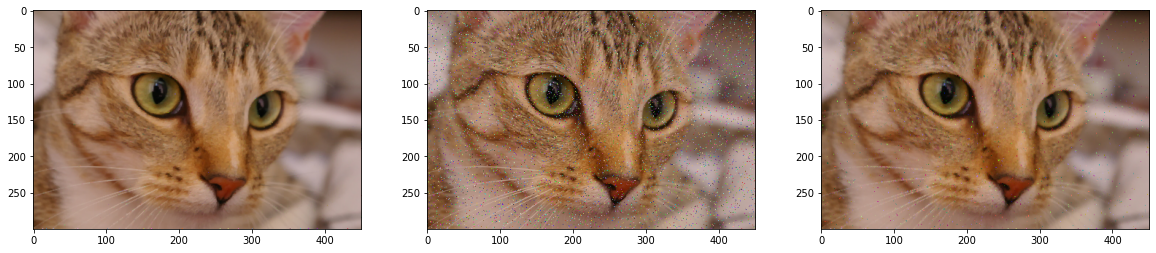

In [7]:
import matplotlib.pyplot as plt
from skimage import util
from skimage.util import img_as_ubyte

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

img_noised = img_as_ubyte(util.random_noise(img, "s&p", amount=20 / 100))

axes[0].imshow(VMF(img_copy))
axes[1].imshow(FMVMF(img_copy))
axes[2].imshow(PNNFMVMF(img_copy, img_noised))

In [8]:
print(NMSE(img, VMF(img_copy)))
print(NMSE(img, FMVMF(img_copy)))
print(NMSE(img, PNNFMVMF(img_copy, img_noised)))

0.20728042114940098
4.229807786493602
0.7858363269804102
